<a href="https://colab.research.google.com/github/srivastavamuskan/Image-Noise-Reduction-using-Autoencoders/blob/main/ImageNoiseReductionAutoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical

%matplotlib inline

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float')/255
x_test = x_test.astype('float')/255

x_train = np.reshape(x_train, (60000, 784))
x_test = np.reshape(x_test, (10000, 784))

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
x_train_noisy = x_train + np.random.rand(60000, 784)*0.9
x_test_noisy = x_test + np.random.rand(10000, 784)*0.9
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

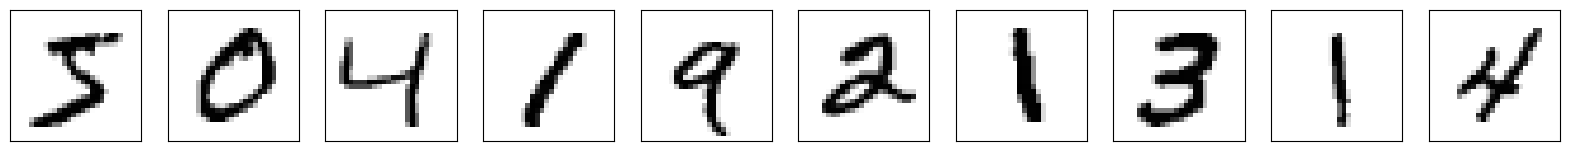

In [ ]:
def plot(x, p, labels = False):
  plt.figure(figsize = (20, 2))
  for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x[i].reshape(28,28), cmap = 'binary')
    plt.xticks([])
    plt.yticks([])
    if labels:
      plt.xlabel(np.argmax(p[i]))
  plt.show()

plot(x_train, None)

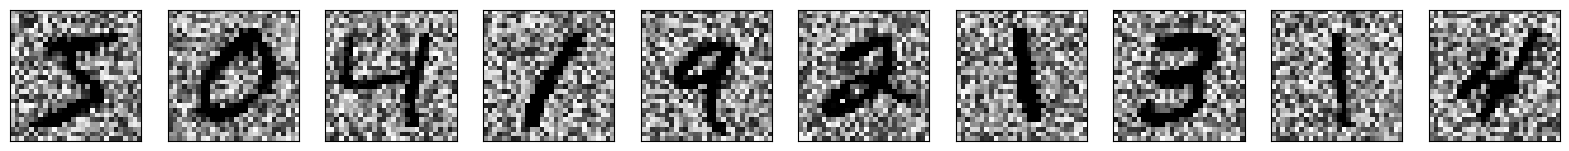

In [ ]:
plot(x_train_noisy, None)

In [ ]:
classifier = Sequential([
    Dense(256, activation = 'relu', input_shape = (784,)),
    Dense(256, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

classifier.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
classifier.fit(x_train, y_train, batch_size = 512, epochs = 3)

Epoch 1/3
118/118 [==============================] - 6s 4ms/step - loss: 0.4125 - accuracy: 0.8836
Epoch 2/3
118/118 [==============================] - 0s 4ms/step - loss: 0.1519 - accuracy: 0.9554
Epoch 3/3
118/118 [==============================] - 0s 4ms/step - loss: 0.1027 - accuracy: 0.9700


In [ ]:
loss, acc = classifier.evaluate(x_test, y_test)
print(acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1000 - accuracy: 0.9693
0.9692999720573425


In [ ]:
loss, acc = classifier.evaluate(x_test_noisy, y_test)
print(acc)

313/313 [==============================] - 1s 2ms/step - loss: 10.7396 - accuracy: 0.1135
0.11349999904632568


In [ ]:
input_image = Input(shape = (784,))
encoded = Dense(64, activation = 'relu')(input_image)
decoded = Dense(784, activation = 'sigmoid')(encoded)

autoencoder = Model(input_image, decoded)
autoencoder.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [ ]:
autoencoder.fit(
    x_train_noisy, x_train, epochs = 100,
    batch_size = 512, validation_split = 0.2, verbose = False,
    callbacks = [
        EarlyStopping(monitor = 'val_loss', patience = 5),
        LambdaCallback(on_epoch_end = lambda e,l: print('{:.3f}'.format(l['val_loss']), end = '_'))
    ]
)

print('_')
print('Training is complete !')

0.259_0.231_0.196_0.174_0.164_0.155_0.148_0.142_0.138_0.134_0.130_0.127_0.124_0.122_0.120_0.118_0.117_0.115_0.114_0.113_0.112_0.111_0.110_0.110_0.109_0.109_0.108_0.108_0.107_0.107_0.107_0.107_0.106_0.106_0.106_0.106_0.106_0.106_0.105_0.105_0.105_0.105_0.105_0.105_0.105_0.105_0.105_0.105_0.105_0.105_0.105_0.105_0.105_0.104_0.105_0.104_0.104_0.105_0.105_0.104_0.104_0.104_0.104_0.104_0.104_0.104_0.104_0.104__
Training is complete !


In [ ]:
predictions = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


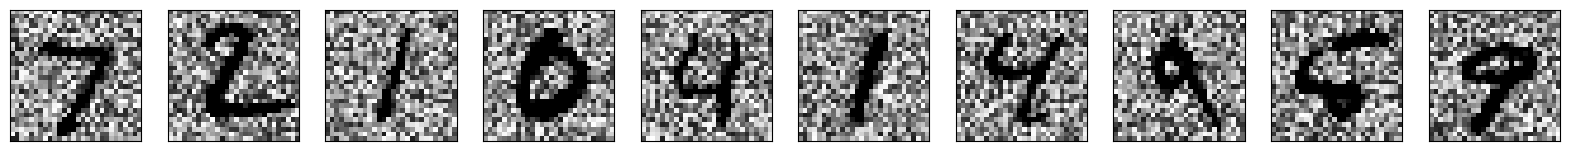

In [ ]:
plot(x_test_noisy, None)

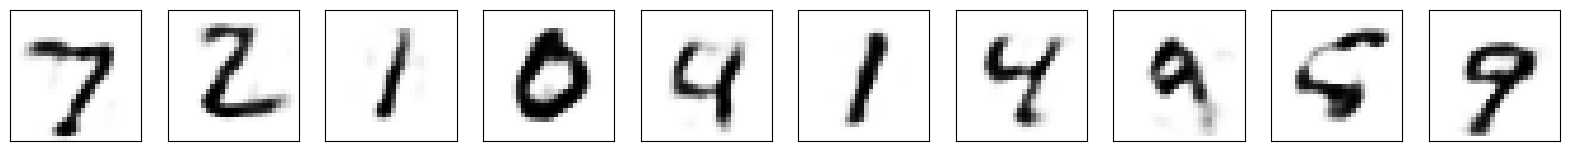

In [ ]:
plot(predictions, None)

In [ ]:
loss, acc = classifier.evaluate(predictions, y_test)
print(acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1668 - accuracy: 0.9456
0.9455999732017517


In [ ]:
input_image = Input(shape = (784,))
x = autoencoder(input_image)
y = classifier(x)

denoise_and_classify = Model(input_image, y)

In [ ]:
predictions = denoise_and_classify.predict(x_test_noisy)

313/313 [==============================] - 1s 1ms/step


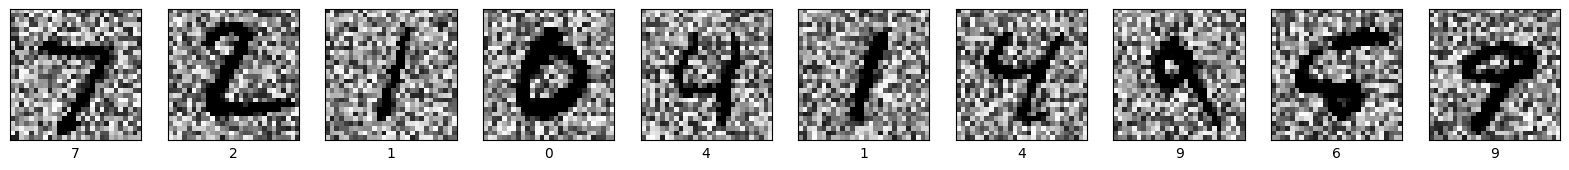

In [ ]:
plot(x_test_noisy, predictions, True)

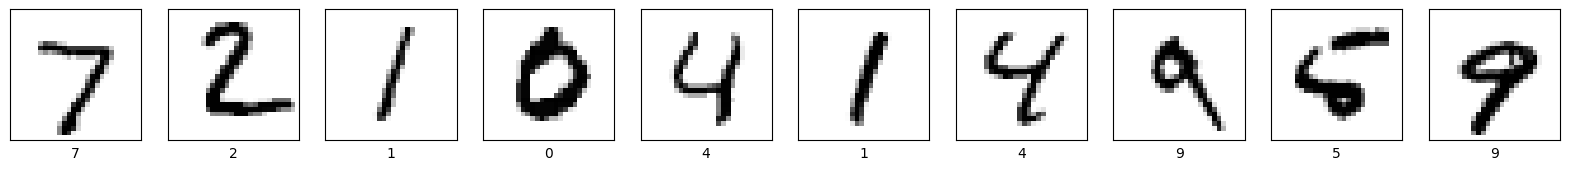

In [ ]:
plot(x_test, to_categorical(y_test), True)